In [1]:
import numpy as np
import matplotlib.pyplot as plt

1. Сгенерировать датасет при помощи `sklearn.datasets.make_regression` и обучить линейную модель при помощи градиентного спуска и стохастического градиентного спуска. Построить графики среднеквадратичной ошибки от числа итераций для обоих методов на одном рисунке, сделать выводы о разнице скорости сходимости каждого из методов.

In [2]:
from sklearn import datasets

X_, y_, coef = datasets.make_regression(n_samples=1000, 
                                      n_features=2, 
                                      n_informative=2, 
                                      n_targets=1,
                                      noise=5, 
                                      bias=0, # intersept=0   
                                      coef=True, 
                                      random_state=42)

In [3]:
coef

array([40.71064891,  6.60098441])

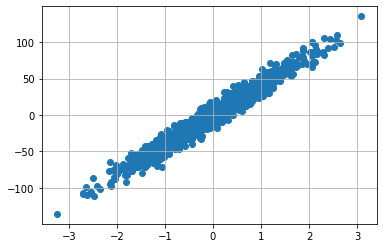

In [4]:
plt.scatter(X_[:, 0], y_);
plt.grid()

2. [\*] Добавить в алгоритм градиентного спуска L1 регуляризацию. Сравнить влияние коэффициентов регуляризации L1 и L2 на величину весов для примера из урока (лучше графически).